In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline

In [2]:
n = 500
cov_nercome = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_nercome_{n}_avg100000.matrix")
cov_sample = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_sample_{n}.matrix")

# 'Real' covariance matrix before processing.
# The term 'real' here indicates that this is the matrix that we use to compare
# our estimates to.
cov_real_preproc = np.loadtxt("../data/C_2048_BOSS_DR12_NGC_z1_V6C_1_1_1_1_1_10_200_200_prerecon.matrix")

In [3]:
print(cov_nercome)
print(cov_sample)

[[ 2.30549339e+08  1.54943867e+07 -1.17842706e+06 ...  4.57327925e+04
  -3.42950598e+03  4.10472910e+04]
 [ 1.54943867e+07  5.81541894e+07  5.20084930e+06 ... -1.09600974e+04
  -2.43369963e+04 -2.49293328e+04]
 [-1.17842706e+06  5.20084930e+06  1.70140282e+07 ...  1.55676223e+04
  -1.22054244e+04 -9.46235864e+03]
 ...
 [ 4.57327925e+04 -1.09600974e+04  1.55676223e+04 ...  6.62989164e+03
   1.58292791e+03  3.12857114e+02]
 [-3.42950598e+03 -2.43369963e+04 -1.22054244e+04 ...  1.58292791e+03
   6.13869078e+03  1.23449857e+03]
 [ 4.10472910e+04 -2.49293328e+04 -9.46235864e+03 ...  3.12857114e+02
   1.23449857e+03  5.86725233e+03]]
[[ 2.12542084e+08  1.53799562e+07  2.20120714e+06 ...  1.84868950e+04
  -1.63784028e+04 -2.17390916e+03]
 [ 1.53799562e+07  5.53939942e+07  6.95019030e+06 ...  2.25659863e+04
   1.61209870e+04 -1.67638996e+04]
 [ 2.20120714e+06  6.95019030e+06  1.76298694e+07 ...  4.09806902e+03
  -5.49204703e+02  1.52030648e+03]
 ...
 [ 1.84868950e+04  2.25659863e+04  4.0980690

In [4]:
indices = np.concatenate((np.arange(40), np.arange(40)+80, np.arange(40)+160))
cov_real = (cov_real_preproc[indices, :])[:, indices]

In [5]:
print(cov_real)

[[ 2.39531896e+08  1.91051563e+07  1.44038639e+05 ...  9.68083967e+03
  -1.21684291e+04  2.21567909e+04]
 [ 1.91051563e+07  5.15256710e+07  4.78376836e+06 ...  9.13608077e+03
   9.26311893e+03 -1.41639754e+04]
 [ 1.44038639e+05  4.78376836e+06  1.67772970e+07 ... -5.49127765e+02
  -2.28200815e+03  6.76773412e+03]
 ...
 [ 9.68083967e+03  9.13608077e+03 -5.49127765e+02 ...  4.22979902e+03
   1.28931823e+03  3.78440184e+02]
 [-1.21684291e+04  9.26311893e+03 -2.28200815e+03 ...  1.28931823e+03
   3.88691287e+03  1.00320951e+03]
 [ 2.21567909e+04 -1.41639754e+04  6.76773412e+03 ...  3.78440184e+02
   1.00320951e+03  3.62984716e+03]]


In [6]:
MSE_NERCOME = np.trace((cov_nercome-cov_real)@(cov_nercome-cov_real).T)
MSE_sample = np.trace((cov_sample-cov_real)@(cov_sample-cov_real).T)
print(f"MSE NERCOME: {MSE_NERCOME}")
print(f"MSE sample: {MSE_sample}")

MSE NERCOME: 1.2887163738729986e+16
MSE sample: 7706072793408161.0


In [7]:
evals_nercome = np.linalg.eigvalsh(cov_nercome)
evals_sample = np.linalg.eigvalsh(cov_sample)
evals_real = np.linalg.eigvalsh(cov_real)

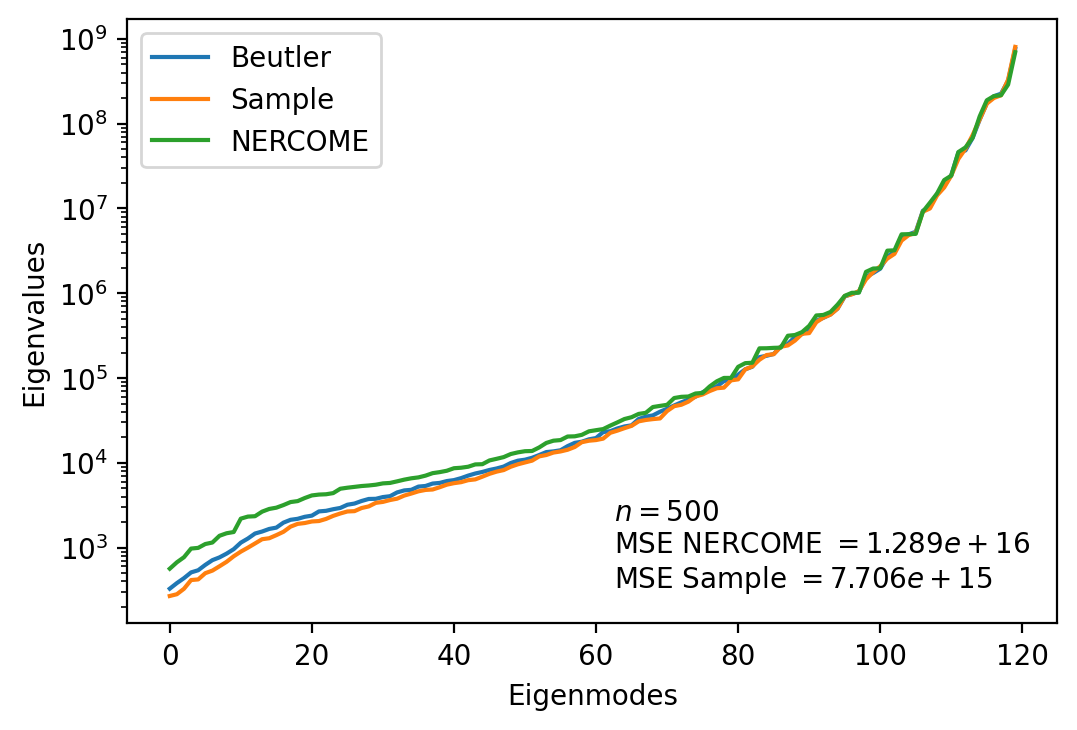

In [8]:
plt.figure(dpi=200)
plt.plot(evals_real, label="Beutler")
plt.plot(evals_sample, label="Sample")
plt.plot(evals_nercome, label="NERCOME")
plt.yscale("log")
plt.legend()
plt.xlabel("Eigenmodes")
plt.ylabel("Eigenvalues")

parameters = AnchoredText(
    fr"$n = {n}$" "\n"
    fr"MSE NERCOME $= {np.format_float_scientific(MSE_NERCOME, precision=3)}$" "\n"
    fr"MSE Sample $={np.format_float_scientific(MSE_sample, precision=3)}$",
    frameon=False, loc="lower right", pad=0.5)
plt.setp(parameters.patch, facecolor='white', alpha=0.5)
plt.gca().add_artist(parameters)

In [9]:
nercome_rel_errors = (cov_nercome-cov_real)/np.abs(cov_real)
print(nercome_rel_errors)

[[-3.75004646e-02 -1.88994504e-01 -9.18132602e+00 ...  3.72405226e+00
   7.18163623e-01  8.52582856e-01]
 [-1.88994504e-01  1.28644969e-01  8.71866925e-02 ... -2.19964979e+00
  -3.62730042e+00 -7.60051971e-01]
 [-9.18132602e+00  8.71866925e-02  1.41102098e-02 ...  2.93497272e+01
  -4.34854551e+00 -2.39815756e+00]
 ...
 [ 3.72405226e+00 -2.19964979e+00  2.93497272e+01 ...  5.67424741e-01
   2.27724759e-01 -1.73298379e-01]
 [ 7.18163623e-01 -3.62730042e+00 -4.34854551e+00 ...  2.27724759e-01
   5.79322971e-01  2.30549110e-01]
 [ 8.52582856e-01 -7.60051971e-01 -2.39815756e+00 ... -1.73298379e-01
   2.30549110e-01  6.16391012e-01]]


In [10]:
nercome_pos_count = 0
nercome_neg_count = 0
for row in nercome_rel_errors:
    for error in row:
        if error >= 0:
            nercome_pos_count += 1
        elif error < 0:
            nercome_neg_count += 1

print(f"NERCOME overestimated {nercome_pos_count} elements")
print(f"NERCOME underestimated {nercome_neg_count} elements")

index_max_nercome = np.unravel_index(np.abs(nercome_rel_errors).argmax(), nercome_rel_errors.shape)

print(f"Maximum relative error is {nercome_rel_errors[index_max_nercome]}")
print(f"Maximum relative error index is {index_max_nercome}")
print(f"NERCOME: {cov_nercome[index_max_nercome]}, real: {cov_real[index_max_nercome]}")

NERCOME overestimated 8161 elements
NERCOME underestimated 6239 elements
Maximum relative error is 33088.45484767793
Maximum relative error index is (25, 54)
NERCOME: 1216.786767750628, real: -0.03677486749440995


In [11]:
sample_rel_errors = (cov_sample-cov_real)/np.abs(cov_real)
print(sample_rel_errors)

[[-1.12677320e-01 -1.94984015e-01  1.42820602e+01 ...  9.09637553e-01
  -3.45975119e-01 -1.09811480e+00]
 [-1.94984015e-01  7.50756486e-02  4.52869324e-01 ...  1.46998542e+00
   7.40341146e-01 -1.83558932e-01]
 [ 1.42820602e+01  4.52869324e-01  5.08170312e-02 ...  8.46286981e+00
   7.59332716e-01 -7.75359604e-01]
 ...
 [ 9.09637553e-01  1.46998542e+00  8.46286981e+00 ...  3.09794531e-02
   1.14954917e-01  6.16237928e-01]
 [-3.45975119e-01  7.40341146e-01  7.59332716e-01 ...  1.14954917e-01
   1.19709952e-01  2.19404892e-01]
 [-1.09811480e+00 -1.83558932e-01 -7.75359604e-01 ...  6.16237928e-01
   2.19404892e-01 -1.84667153e-03]]


In [12]:
sample_pos_count = 0
sample_neg_count = 0
for row in sample_rel_errors:
    for error in row:
        if error >= 0:
            sample_pos_count += 1
        elif error < 0:
            sample_neg_count += 1

print(f"Sample overestimated {sample_pos_count} elements")
print(f"Sample underestimated {sample_neg_count} elements")

index_max_sample = np.unravel_index(np.abs(sample_rel_errors).argmax(), sample_rel_errors.shape)

print(f"Maximum relative error is {sample_rel_errors[index_max_sample]}")
print(f"Maximum relative error index is {index_max_sample}")
print(f"Sample: {cov_sample[index_max_sample]}, real: {cov_real[index_max_sample]}")

Sample overestimated 7265 elements
Sample underestimated 7135 elements
Maximum relative error is 31038.189827387545
Maximum relative error index is (25, 54)
Sample: 1141.3885433010255, real: -0.03677486749440995
